In [1]:
# File: linear_regression_one_varialbe
# Name: Chia-Lin Ko
# ----------------------------
# This file shows the fundamental concepts of 
# machine learing:
#   - loss function
#   - cost function
#   - linear regression
#.  - polynomial features
#   - training process

In [2]:
import matplotlib.pyplot as plt
import numpy as np

$J(\theta_3, \theta_2, \theta_1, b) = 
\frac{1}{2m} \sum_{i=1}^{m} (\theta_1 x_i^3 + \theta_2 x_i^2 +\theta_3 x_i + b - y_i)^2$

In [3]:
# This function computes the L2 loss which is 
# ----------------------------------------
# [sum of (hypothesis(x_i) - y_i)^2] / 2*m
# where hypothesis(x_i) == theta1(x_i^3) + theta2(x_i^2) + theta3(x_i) + b
# ----------------------------------------
# x_list: list, containing 21 data points
# y_list: list, containing 21 data points
# theta1: float, the parameter of x_i^3
# theta2: float, the parameter of x_i^2
# theta3: float, the parameter of x_i
# b     : float, the parameter that controls the amount of line shift
# return: floar, the sum over all L2 losses of data points

def cost_function(theta1, theta2, theta3, b, x, y):
    return sum((theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])**2  for i in range(len(x)))/(2*len(x))

In [4]:
# Test for cost_function. You should see 0.14631688333333334
print(cost_function(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

0.14631688333333334


$\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (\theta_1 x_i^3 + \theta_2 x_i^2 +\theta_3 x_i + b - y_i) (x_i^3)$

In [5]:
def dJ_dtheta1(theta1, theta2, theta3, b, x, y):
    return sum( (theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])*x[i]**3 for i in range(len(x)))/len(x)

In [6]:
# Test for dJ_dtheta1. You should see -0.040437
print(dJ_dtheta1(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.040437


$\frac{\partial J}{\partial \theta_2} = \frac{1}{m} \sum_{i=1}^{m} (\theta_1 x_i^3 + \theta_2 x_i^2 +\theta_3 x_i + b - y_i) (x_i^2)$

In [7]:
def dJ_dtheta2(theta1, theta2, theta3, b, x, y):
    return sum( (theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])*x[i]**2 for i in range(len(x)))/len(x)

In [8]:
# Test for dJ_dtheta2. You should see -0.09252266666666666
print(dJ_dtheta2(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.09252266666666666


$\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (\theta_1 x_i^3 + \theta_2 x_i^2 +\theta_3 x_i + b - y_i) (x_i)$

In [9]:
def dJ_dtheta3(theta1, theta2, theta3, b, x, y):
    return sum( (theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])*x[i] for i in range(len(x)))/len(x)

In [10]:
# Test for dJ_dtheta3. You should see -0.21906
print(dJ_dtheta3(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.21906


$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\theta_1 x_i^3 + \theta_2 x_i^2 +\theta_3 x_i + b - y_i)$

In [11]:
def dJ_db(theta1, theta2, theta3, b, x, y):
    return sum( (theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i]) for i in range(len(x)))/len(x)

In [12]:
# Test for dJ_db. You should see -0.5394666666666666
print(dJ_db(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.5394666666666666


In [13]:
# ---------- DO NOT EDIT THE CODE BELOW THIS LINE ---------- #

In [14]:
x = [6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,5.7107,10.164,5.734,8.4084,5.6407,5.3794,6.3654,5.1301,6.4296,7.0708,6.1891]

In [15]:
y = [6.592,9.1302,13.662,11.854,6.8233,11.886,4.3483,12,6.5987,3.8166,3.2522,15.505,3.1551,7.2258,0.71618,3.5129,5.3048,0.56077,3.6518,5.3893,3.1386]

In [16]:
# ---------- Showing your data ---------- #

(0.0, 30.0)

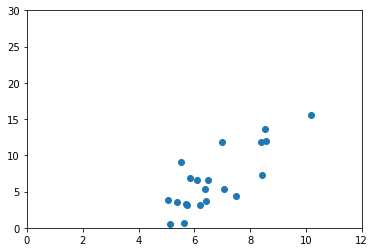

In [17]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,30])

In [18]:
# Please do feature scaling (normalization) by: 
# subtracting min(x) from each data point and dividing the result with (max(x)-min(x))
x = list( (x[i]-min(x))/( max(x)-min(x)) for i in range(len(x)))
y = list( (y[i]-min(y))/( max(y)-min(y)) for i in range(len(y)))

In [19]:
print(x[10])         # You should see 0.12841038086663803
print(y[10])         # You should see 0.18009827204211928

0.12841038086663803
0.18009827204211928


(0.0, 2.0)

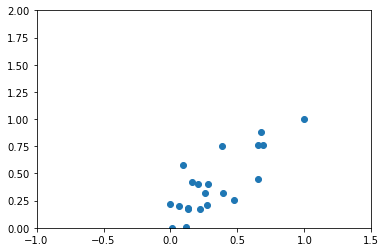

In [20]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([-1,1.5])
axes.set_ylim([0,2])

In [21]:
# ------------ Initialize your theta ------------ #
# ---------  Choose from -1 to +1 ---------- #

In [22]:
theta1 = -0.2        
theta2 = 0.5
theta3 = 0.5
b = 0.5


In [23]:
# ---------- Initialize your alpha ---------- #

In [24]:
# TODO: which value is appropriate for alpha?
# Try 0.001, 0.01, 0.1

In [25]:
alpha = 0.1

In [26]:
# ---------- Training process ---------- #
# ---- 50 iterations over all data ----- # 

In [27]:
# Remember to append updated theta1, theta2, theta3, b to 
# The lists as well as the updated cost.

theta1_history = []
theta2_history = []
theta3_history = []
b_history = []
cost_history = []
for i in range(50):
    theta1_history.append(theta1)
    theta2_history.append(theta2)
    theta3_history.append(theta3)
    b_history.append(b)
    cost = cost_function(theta1, theta2, theta3, b, x, y)
    cost_history.append(cost)
    
    # Steeptest decscent
    temp_theta1 = theta1
    temp_theta2 = theta2
    temp_theta3 = theta3
    temp_b = b
    
    theta1 = temp_theta1- alpha*dJ_dtheta1(temp_theta1, temp_theta2, temp_theta3, temp_b, x, y)
    theta2 = temp_theta2- alpha*dJ_dtheta2(temp_theta1, temp_theta2, temp_theta3, temp_b, x, y)
    theta3 = temp_theta3- alpha*dJ_dtheta3(temp_theta1, temp_theta2, temp_theta3, temp_b, x, y)
    b = temp_b- alpha*dJ_db(temp_theta1, temp_theta2, temp_theta3, temp_b, x, y)

In [28]:
# ---------- Cost changes during training process ---------- #

In [29]:
# Pay attention to the trend of cost. 
# Is is rising? If it is, why?

print(cost_history)

[0.06664699844792138, 0.055288442308969996, 0.04643318321001547, 0.039527438018938675, 0.034139994745120146, 0.029935081493679665, 0.02665124091527073, 0.02408488082479581, 0.02207746591116456, 0.02050554457649872, 0.01927298334418255, 0.01830492018678123, 0.0175430562881447, 0.01694198997517558, 0.016466362133400886, 0.01608863348319739, 0.01578735385341166, 0.015545814548085402, 0.015350999008145174, 0.015192765740126148, 0.015063212099391371, 0.01495617889555775, 0.014866864649051837, 0.014791525227485567, 0.01472723996303418, 0.01467172953528005, 0.014623214161291429, 0.014580303170999887, 0.014541909020822514, 0.01450718033621303, 0.01447544977118362, 0.014446193405159867, 0.014418999123480694, 0.01439354199311514, 0.014369565085306226, 0.014346864539565532, 0.014325277930294936, 0.014304675205097398, 0.014284951625629396, 0.01426602226782684, 0.014247817736429256, 0.014230280825107123, 0.014213363912970775, 0.014197026934548143, 0.014181235796376992, 0.014165961141434237, 0.01415

In [30]:
# ---------------------------- Please do not modify codes below this line ---------------------------- #

theta1: -0.2, theta2: 0.5, theta3: 0.5, b: 0.5


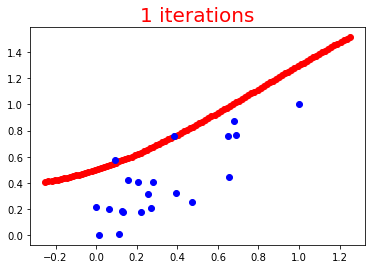

In [31]:
theta1 = theta1_history[0]
theta2 = theta2_history[0]
theta3 = theta3_history[0]
b = b_history[0]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("1 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: -0.2174168238283717, theta2: 0.47242720317203274, theta3: 0.4443269963542847, b: 0.3105518224872341


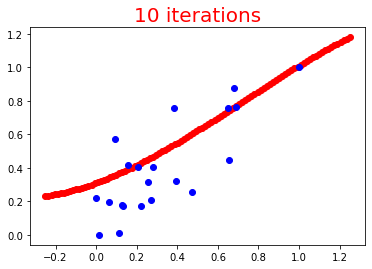

In [32]:
theta1 = theta1_history[9]
theta2 = theta2_history[9]
theta3 = theta3_history[9]
b = b_history[9]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("10 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: -0.2170547536988149, theta2: 0.46994924591126713, theta3: 0.4320203576383634, b: 0.2406924551540982


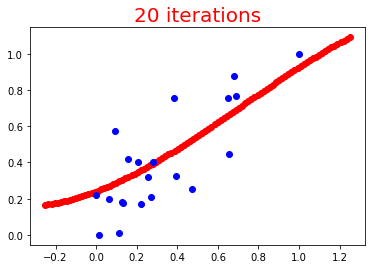

In [33]:
theta1 = theta1_history[19]
theta2 = theta2_history[19]
theta3 = theta3_history[19]
b = b_history[19]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("20 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

In [34]:
# ---------- Plot the errors over the training process ---------- #

theta1: -0.2113339672291519, theta2: 0.4754408956694673, theta3: 0.43454803241497614, b: 0.21629527794244238


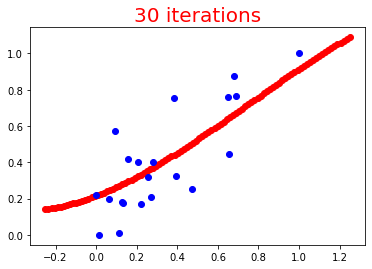

In [35]:
theta1 = theta1_history[29]
theta2 = theta2_history[29]
theta3 = theta3_history[29]
b = b_history[29]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("30 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: -0.20488748344270116, theta2: 0.4823375199644718, theta3: 0.44049382670483184, b: 0.20552470783099705


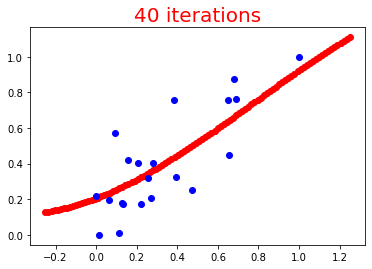

In [36]:
theta1 = theta1_history[39]
theta2 = theta2_history[39]
theta3 = theta3_history[39]
b = b_history[39]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("40 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

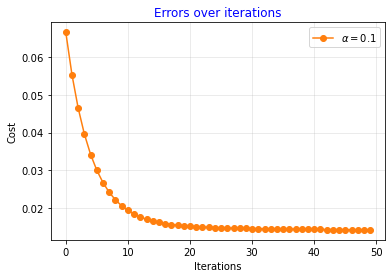

In [37]:
cost_x = list(range(len(cost_history)))
cost_y = cost_history
plt.plot(cost_x, cost_y, 'o-', c='C1', label=r'$\alpha=$%s'%(alpha))

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("Errors over iterations", color = 'blue')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()

In [38]:
def cal_cost(alpha, theta1 = -0.2, theta2 = 0.5, theta3 = 0.5, b = 0.5):
    theta1_history = []
    theta2_history = []
    theta3_history = []
    b_history = []
    cost_history = []
    for i in range(50):
        theta1_history.append(theta1)
        theta2_history.append(theta2)
        theta3_history.append(theta3)
        b_history.append(b)
        cost = cost_function(theta1, theta2, theta3, b, x, y)
        cost_history.append(cost)

        # Steeptest decscent
        temp_theta1 = theta1
        temp_theta2 = theta2
        temp_theta3 = theta3
        temp_b = b

        theta1 = temp_theta1- alpha*dJ_dtheta1(temp_theta1, temp_theta2, temp_theta3, temp_b, x, y)
        theta2 = temp_theta2- alpha*dJ_dtheta2(temp_theta1, temp_theta2, temp_theta3, temp_b, x, y)
        theta3 = temp_theta3- alpha*dJ_dtheta3(temp_theta1, temp_theta2, temp_theta3, temp_b, x, y)
        b = temp_b- alpha*dJ_db(temp_theta1, temp_theta2, temp_theta3, temp_b, x, y)
        
    return cost_history

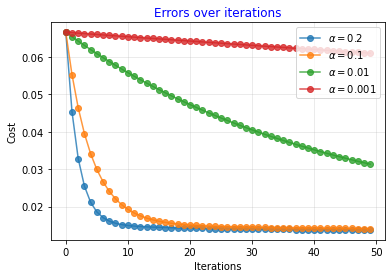

In [39]:
alpha_lst = [0.2, 0.1, 0.01, 0.001]
for alpha in alpha_lst:
    cost_history = cal_cost(alpha)
    cost_x = list(range(len(cost_history)))
    cost_y = cost_history   
    plt.plot(cost_x, cost_y, 'o-', label=r'$\alpha=$%s'%(alpha), alpha=0.8)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("Errors over iterations", color = 'blue')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()